# **PCA**

**Elaborated By: Sirine MAAROUFI**


---
## **Introduction**
---

Principal Component Analysis (PCA) is a widely used dimensionality reduction technique that helps in compressing data while retaining the most relevant information. In this practical exercise, we will apply PCA to the well-known Iris dataset, which contains three different species of the Iris flower (Setosa, Versicolour, and Virginica) with four measured features. The goal is to reduce the dataset's dimensionality and visualize the transformed data in lower-dimensional spaces. Through this process, we aim to understand the number of principal components needed to adequately represent the data while retaining as much variability as possible.


---
## **Step 1: Import Libraries**
---

In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

---
## **Step 2: Import the data**
---

The Iris dataset is loaded from the `sklearn.datasets` package. We extract the data (features) and the target (species labels). We then display the dimensions of the dataset and the names of the features.

In [17]:
# Import the data from the "IRIS" dataset
iris = load_iris()
data = iris.data
target = iris.target

In [18]:
# Display the dimensions of the dataset
print("Dimensions of the dataset:", data.shape)

Dimensions of the dataset: (150, 4)


In [19]:
# Display the names of the variables
print("Variable names:", iris.feature_names)

Variable names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


---
## **Step 3: Data Normalization**
---

PCA is sensitive to the scale of the data, so it's important to normalize the features to have zero mean and unit variance. We use `StandardScaler` for this purpose.



In [20]:
# Center and scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

---
## **Step 4: PCA**
---

We perform PCA on the normalized data to transform the original features into a set of linearly uncorrelated components ordered by the amount of variance they explain.



In [21]:
# Perform PCA
pca = PCA()
data_pca = pca.fit_transform(data_scaled)

In [22]:
# Project the data onto the new axes
print("Projected data (first 5 samples):\n", data_pca[:5])

Projected data (first 5 samples):
 [[-2.26470281  0.4800266   0.12770602 -0.0241682 ]
 [-2.08096115 -0.67413356  0.23460885 -0.10300677]
 [-2.36422905 -0.34190802 -0.04420148 -0.02837705]
 [-2.29938422 -0.59739451 -0.09129011  0.06595556]
 [-2.38984217  0.64683538 -0.0157382   0.03592281]]


---
## **Step 5: Finding the optimal number of principle components**
---

To determine how many principal components to retain, we examine the explained variance ratio, which indicates how much variance each principal component captures. We also plot the cumulative explained variance to visualize the total variance explained as we add more components.

Explained variance ratio: [0.72962445 0.22850762 0.03668922 0.00517871]
Cumulative explained variance: [0.72962445 0.95813207 0.99482129 1.        ]


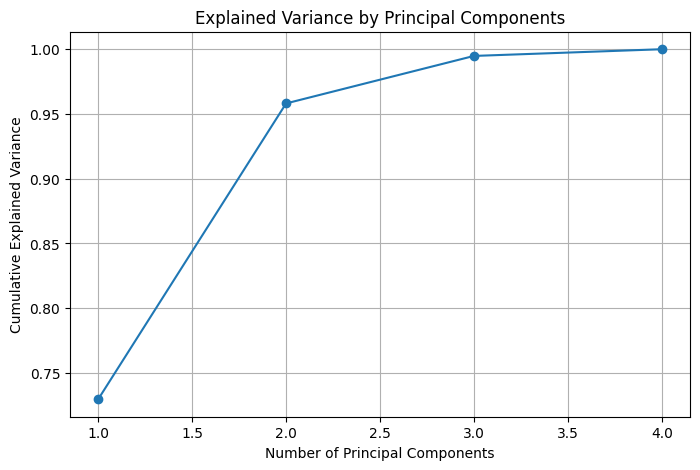

In [23]:
# Display the explained inertia
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print("Explained variance ratio:", explained_variance)
print("Cumulative explained variance:", cumulative_variance)

# Plotting cumulative explained variance to determine the number of components to retain
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()

---
## **Step 6: Visualization of the data with reduced dimensions**
---
We visualize the data projected onto the first three and then the first two principal components to see how well the PCA transformation separates the three Iris species.

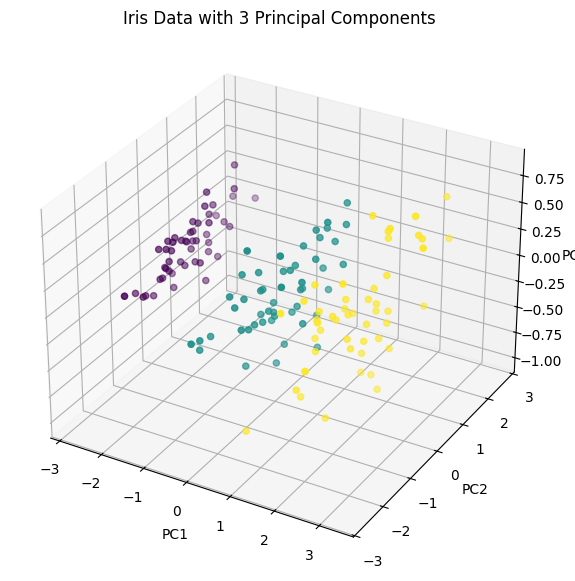

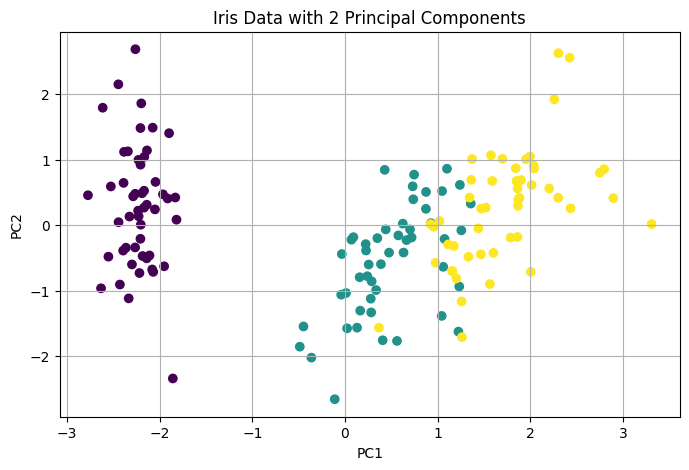

In [24]:
# Display data with 3 and 2 principal components
# Plotting the first three principal components
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=target, cmap='viridis')
ax.set_title('Iris Data with 3 Principal Components')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

# Plotting the first two principal components
plt.figure(figsize=(8, 5))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=target, cmap='viridis')
plt.title('Iris Data with 2 Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()


---
## **Conclusion**
---

The results indicate that the first two principal components explain a significant portion of the variance in the Iris dataset, making them effective for dimensionality reduction and visualization. The cumulative explained variance plot shows that over 95% of the variance is retained with three components, suggesting that most of the original data's information is preserved.

Visualizing the data in both 2D and 3D space demonstrates that the classes (Setosa, Versicolour, and Virginica) are well-separated, especially when using three components, confirming the effectiveness of PCA in this case. Consequently, we conclude that reducing the dimensionality from four to three principal components provides a meaningful representation of the data while simplifying the analysis.